<a href="https://colab.research.google.com/github/anuragal/deep-learning/blob/master/S11/superconvergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cyclic Curve

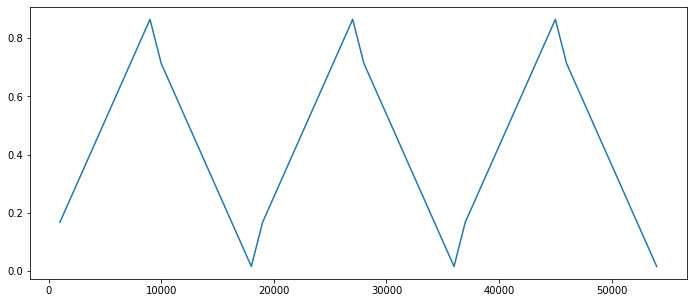

In [1]:
from cycliclr import plot_cyclic_curve

iterations = 10010
stepsize = 1000
lr_min = 0.08
lr_max = 0.8

plot_cyclic_curve(iterations, stepsize, lr_min, lr_max)

## Model

In [2]:
!pip install albumentations==0.4.5

import torch
import torch.nn as nn
import torch.nn.functional as F

!pip install torchsummary
from torchsummary import summary

from models.S11model import S11Cifar10DNN

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = S11Cifar10DNN().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

## Run the Model

In [0]:
%matplotlib inline

In [4]:
import torch.nn as nn

from dataloader import ImageData
from models.resnet18 import ResNet18
from datamodel import DataModel
from optimizer import OptimizerFactory

from torch.optim.lr_scheduler import OneCycleLR

# Loading data and transforming it
img_data = ImageData()

# Choose from "albumentations" or "pytorch". Default is "pytorch"
img_data.load("albumentations")

criterion = nn.CrossEntropyLoss()

# optimizer can be choose from "SGD" & "Adam"
optim_sgd = OptimizerFactory("SGD")
optimizer = optim_sgd.load(params=model.parameters(), lr=0.02, momentum=0.9, weight_decay=5e-4)

dm = DataModel(img_data, criterion, optimizer, None, num_of_epochs = 30, cal_misclassified = True)

  pip install torch-lr-finder -v --global-option="amp"


CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


### Find LR Max

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


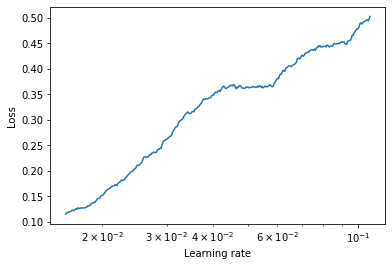

In [12]:
lr = dm.find_lr_max(model, device)

### LR Max

In [13]:
print(lr)

0.015


## Run Model

In [7]:
# training the dataset and then running test
scheduler = OneCycleLR(optimizer, max_lr=lr, epochs=30, steps_per_epoch = len(img_data.trainloader), 
                          anneal_strategy='cos',
                          base_momentum=0.85,
                          cycle_momentum=True,
                          div_factor=10,
                          final_div_factor=10000.0,
                          last_epoch=-1,
                          max_momentum=0.95,
                          pct_start=0.3
                        )
dm.schedular = scheduler
dm.optimizer = optim_sgd.load(params=model.parameters(), lr=lr/10, momentum=0.9, weight_decay=0.005)
dm.run_model(model, device)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Loss=2.044921398162842 Batch_id=97 Accuracy=24.40: 100%|██████████| 98/98 [00:24<00:00,  3.96it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 3386/10000 (33.86%)

EPOCH: 2


Loss=1.2360424995422363 Batch_id=97 Accuracy=47.12: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5038/10000 (50.38%)

EPOCH: 3


Loss=0.9706233143806458 Batch_id=97 Accuracy=60.97: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 6628/10000 (66.28%)

EPOCH: 4


Loss=0.7690310478210449 Batch_id=97 Accuracy=69.91: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7179/10000 (71.79%)

EPOCH: 5


Loss=0.7327748537063599 Batch_id=97 Accuracy=75.67: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7710/10000 (77.10%)

EPOCH: 6


Loss=0.48507601022720337 Batch_id=97 Accuracy=80.12: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8109/10000 (81.09%)

EPOCH: 7


Loss=0.4140677750110626 Batch_id=97 Accuracy=82.98: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8140/10000 (81.40%)

EPOCH: 8


Loss=0.529409646987915 Batch_id=97 Accuracy=84.92: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8386/10000 (83.86%)

EPOCH: 9


Loss=0.39298656582832336 Batch_id=97 Accuracy=86.79: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8556/10000 (85.56%)

EPOCH: 10


Loss=0.37611788511276245 Batch_id=97 Accuracy=88.07: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8412/10000 (84.12%)

EPOCH: 11


Loss=0.3637019991874695 Batch_id=97 Accuracy=89.41: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8512/10000 (85.12%)

EPOCH: 12


Loss=0.28405019640922546 Batch_id=97 Accuracy=90.34: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8715/10000 (87.15%)

EPOCH: 13


Loss=0.25728487968444824 Batch_id=97 Accuracy=91.39: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8484/10000 (84.84%)

EPOCH: 14


Loss=0.2449411153793335 Batch_id=97 Accuracy=92.07: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8860/10000 (88.60%)

EPOCH: 15


Loss=0.25089049339294434 Batch_id=97 Accuracy=92.57: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8771/10000 (87.71%)

EPOCH: 16


Loss=0.20090548694133759 Batch_id=97 Accuracy=92.90: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8596/10000 (85.96%)

EPOCH: 17


Loss=0.19152146577835083 Batch_id=97 Accuracy=93.52: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8535/10000 (85.35%)

EPOCH: 18


Loss=0.18483203649520874 Batch_id=97 Accuracy=93.76: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8801/10000 (88.01%)

EPOCH: 19


Loss=0.13402262330055237 Batch_id=97 Accuracy=94.01: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8618/10000 (86.18%)

EPOCH: 20


Loss=0.17804284393787384 Batch_id=97 Accuracy=94.40: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8575/10000 (85.75%)

EPOCH: 21


Loss=0.1285051554441452 Batch_id=97 Accuracy=94.83: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8766/10000 (87.66%)

EPOCH: 22


Loss=0.18258365988731384 Batch_id=97 Accuracy=94.93: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8754/10000 (87.54%)

EPOCH: 23


Loss=0.17925086617469788 Batch_id=97 Accuracy=94.89: 100%|██████████| 98/98 [00:25<00:00,  3.78it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8693/10000 (86.93%)

EPOCH: 24


Loss=0.1675601601600647 Batch_id=97 Accuracy=95.42: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8929/10000 (89.29%)

EPOCH: 25


Loss=0.2040330171585083 Batch_id=97 Accuracy=95.40: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8840/10000 (88.40%)

EPOCH: 26


Loss=0.1679501235485077 Batch_id=97 Accuracy=95.64: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8666/10000 (86.66%)

EPOCH: 27


Loss=0.16938665509223938 Batch_id=97 Accuracy=95.79: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]



Test set: Average loss: 0.0006, Accuracy: 9063/10000 (90.63%)

****Required Accuracy is acheived****


## Plotting Test & Train Accuracy

[24.404, 47.12, 60.966, 69.914, 75.668, 80.116, 82.982, 84.92, 86.786, 88.068, 89.412, 90.344, 91.386, 92.066, 92.566, 92.9, 93.522, 93.756, 94.008, 94.396, 94.828, 94.926, 94.888, 95.416, 95.404, 95.642, 95.79]
[33.86, 50.38, 66.28, 71.79, 77.1, 81.09, 81.4, 83.86, 85.56, 84.12, 85.12, 87.15, 84.84, 88.6, 87.71, 85.96, 85.35, 88.01, 86.18, 85.75, 87.66, 87.54, 86.93, 89.29, 88.4, 86.66, 90.63]


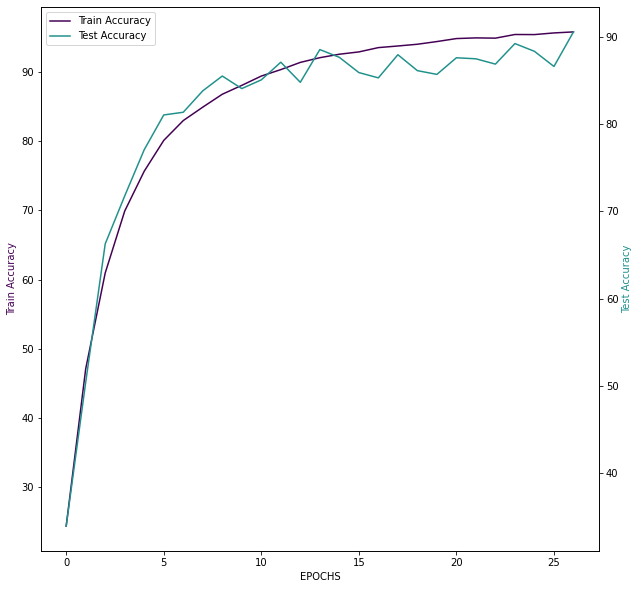

In [8]:
dm.plot_test_train_accuracy()

## Plotting Validation Accuracy

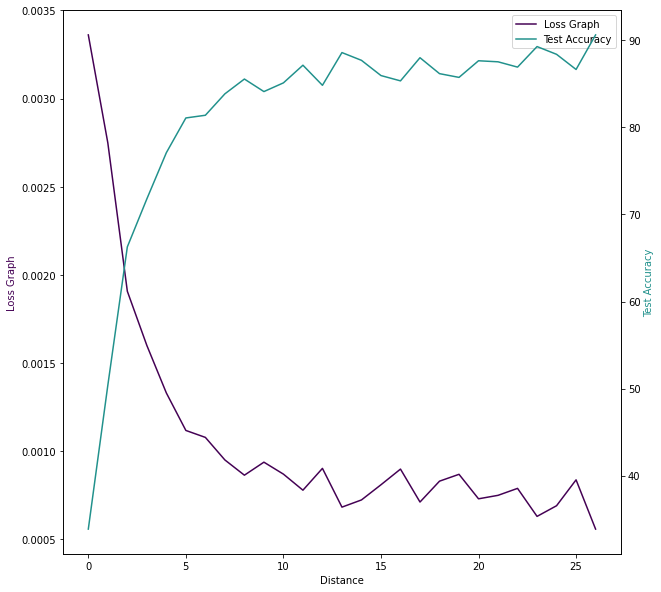

In [9]:
dm.plot_loss_accuracy()

## Plotting Misclassified Images

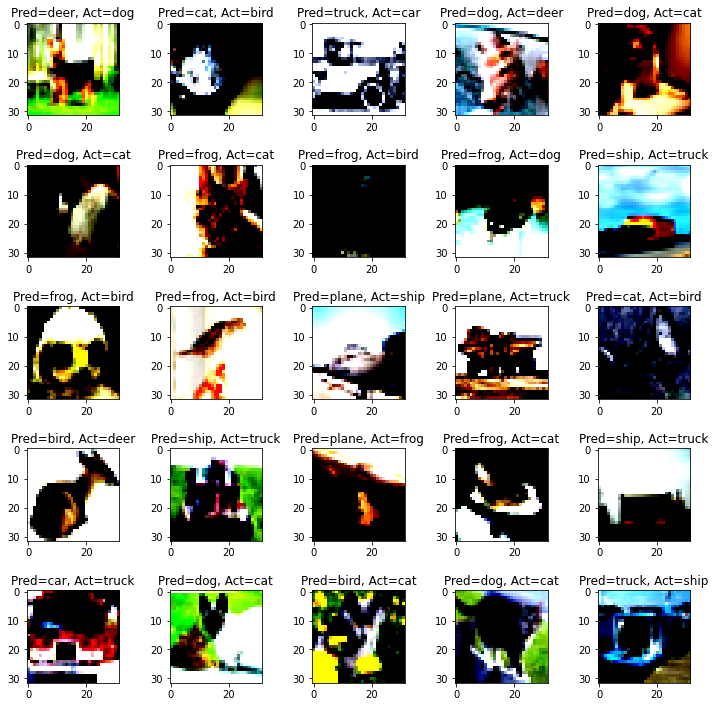

In [14]:
dm.plot_misclassified()

/content/gradcam.py:109: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  subplot_kw={'xticks': [], 'yticks': []})


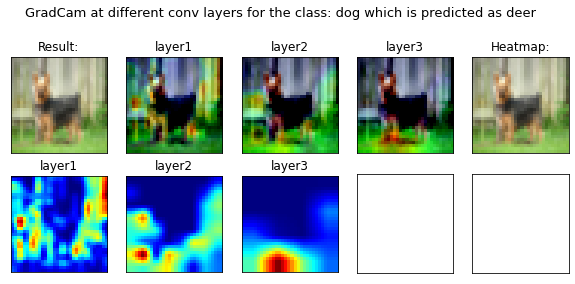

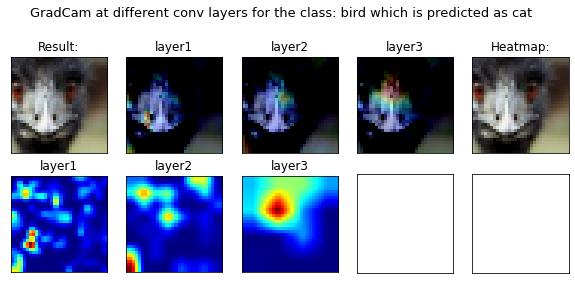

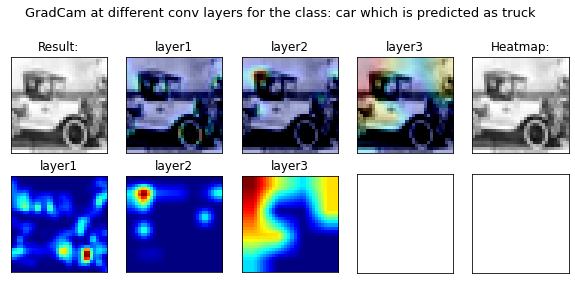

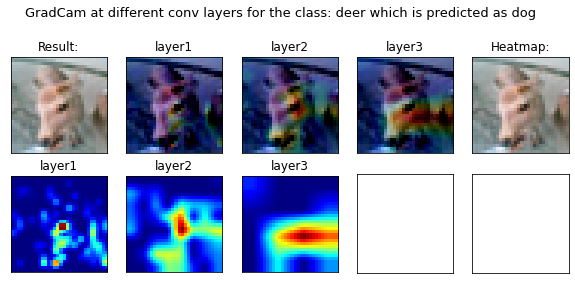

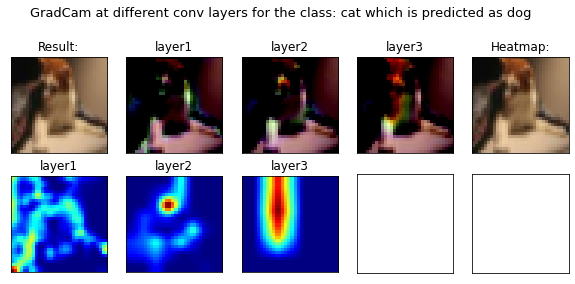

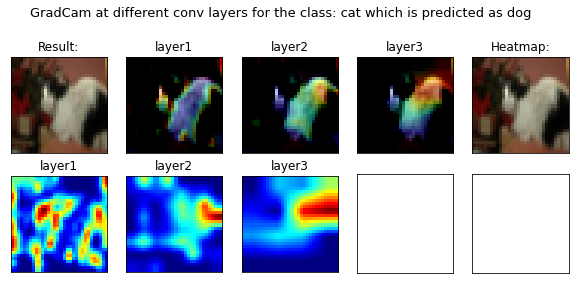

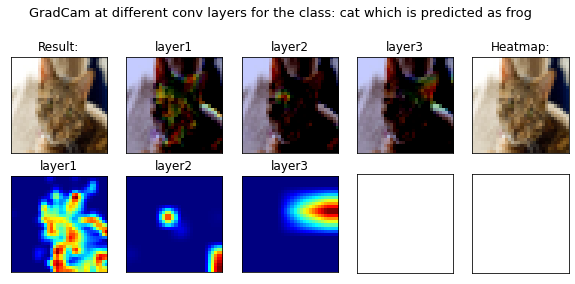

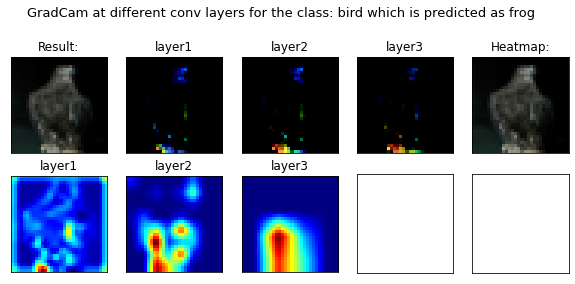

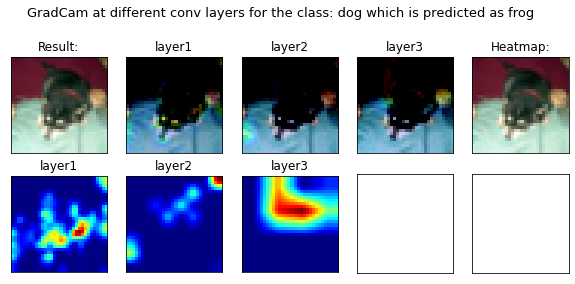

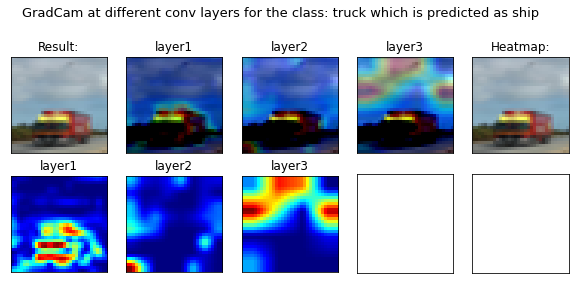

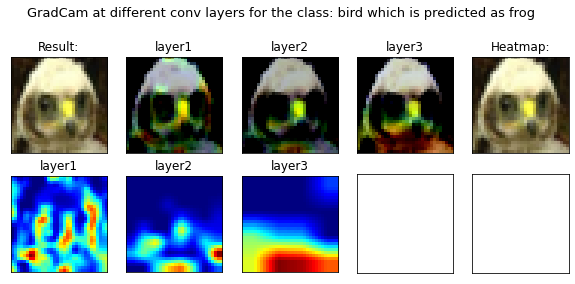

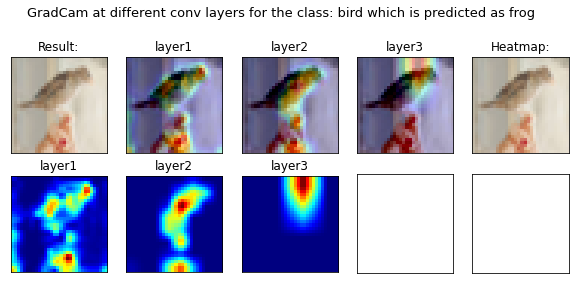

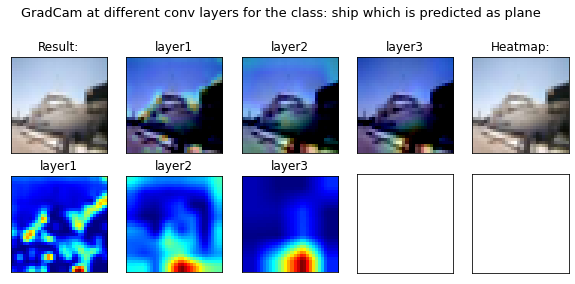

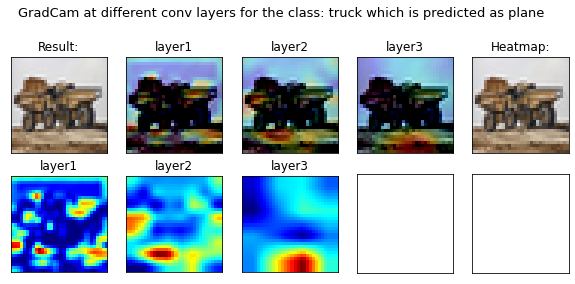

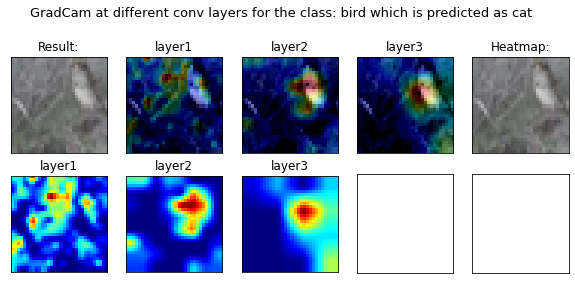

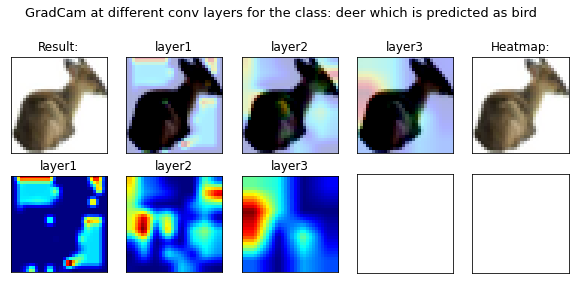

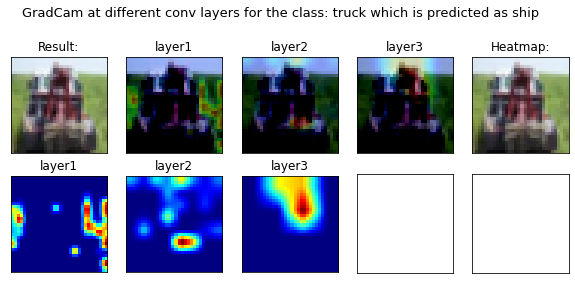

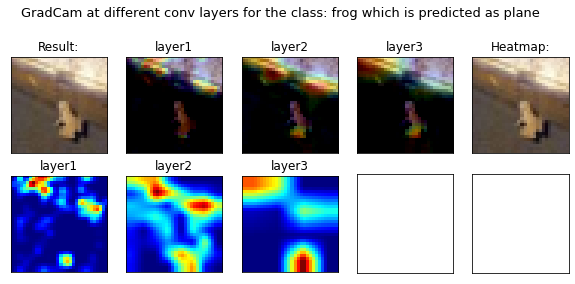

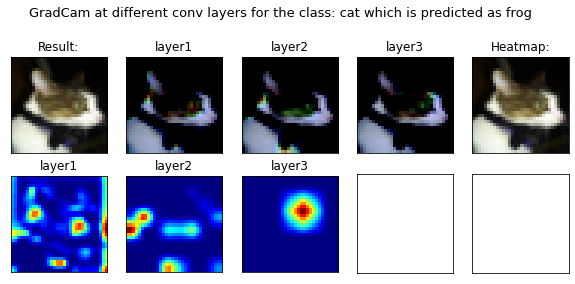

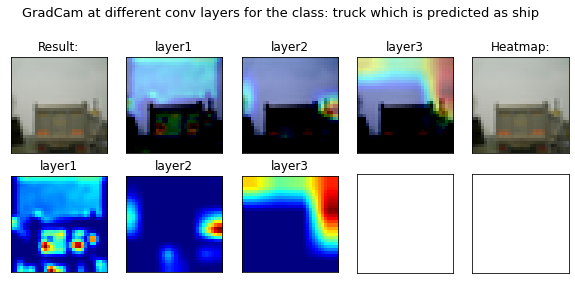

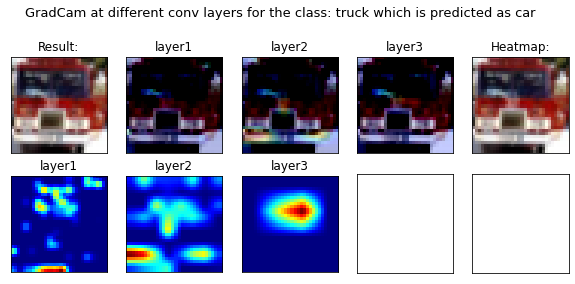

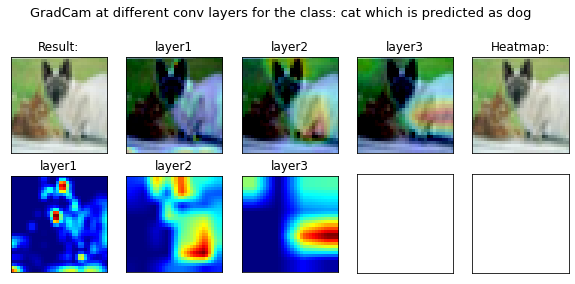

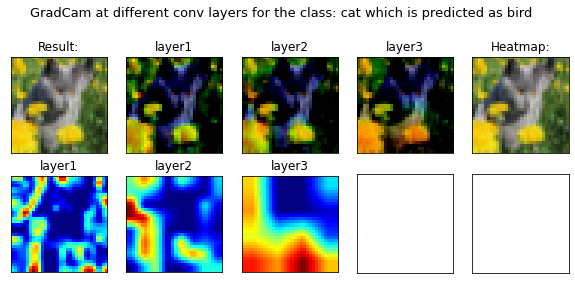

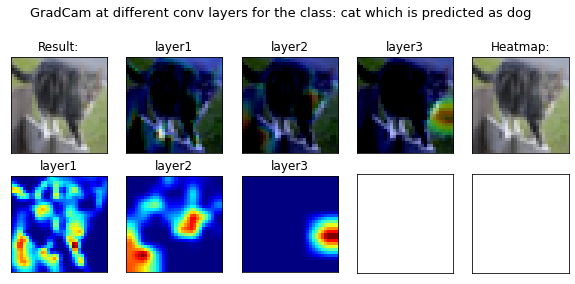

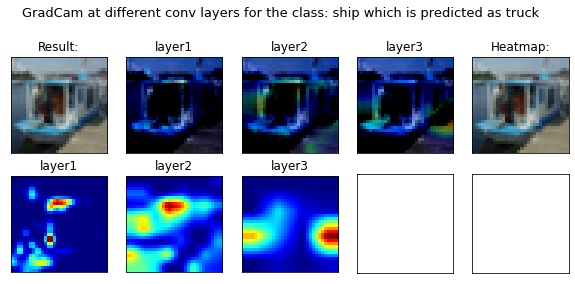

In [15]:
dm.plot_GRADcam(["layer1","layer2","layer3"])